In [2]:
import tensorflow as tf
import numpy as np

N=10000
Wafer1 = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Wafer2 = np.random.normal(loc = 2.0, scale = 1, size = N)
print(np.shape(Wafer1))

(10000,)


In [3]:
import matplotlib.pyplot as plt
plt.hist(Wafer1, bins=30)
plt.hist(Wafer2, bins=30)
plt.show()

<Figure size 640x480 with 1 Axes>

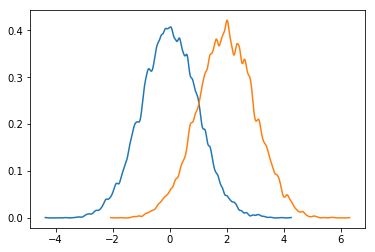

In [4]:
from scipy.stats import gaussian_kde
pdf1 = gaussian_kde(Wafer1)
pdf2 = gaussian_kde(Wafer2)
grid1 = np.linspace(min(Wafer1), max(Wafer1), num=1000)
grid2 = np.linspace(min(Wafer2), max(Wafer2), num=1000)
# Default: Scott
# pdf1.set_bandwidth(bw_method='silverman')
# pdf2.set_bandwidth(bw_method='silverman')
pdf1.set_bandwidth(bw_method=pdf1.factor / 3.)
pdf2.set_bandwidth(bw_method=pdf2.factor / 3.)
y1 = pdf1(grid1)
y2 = pdf2(grid2)
plt.plot(grid1, y1)
plt.plot(grid2, y2)
plt.show()

In [8]:
def my_func(xx, w, b):
#     a = np.matmul(w,xx) + b
    a = w*xx + b
    print(a)
    return np.float32(pdf2(a))

xx = tf.placeholder(tf.float32)
w = tf.Variable(1.0, name='slope')
b = tf.Variable(1.9, name='offset')
y = tf.py_func(my_func, [xx, w, b], tf.float32)

print('type y: ', type(y))
with tf.Session() as sess:
    XX =np.arange(9.0)
    W = 2
    B = 1
    a = sess.run(y, feed_dict={xx:XX, w:W, b:B})
    print(type(a))
    print(a)

type y:  <class 'tensorflow.python.framework.ops.Tensor'>
[ 1.  3.  5.  7.  9. 11. 13. 15. 17.]
<class 'numpy.ndarray'>
[0.23605001 0.21120086 0.0028131  0.         0.         0.
 0.         0.         0.        ]
